# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Pramudya Kusuma Hardika
- Email: pramudyakusuma.pk@gmail.com
- Id Dicoding: pramudyadika

Proyek ini merupakan tugas akhir dari program analisis data yang diadakan oleh Dicoding dalam kelas ID Camp 2023 Data Science. Dalam proyek ini, peserta memiliki opsi untuk memilih salah satu dari tiga dataset yang disediakan, dan saya telah memilih dataset e-commerce sebagai fokus analisis. Dataset ini terdiri dari beberapa file berformat .csv, dan pada kesempatan ini, saya akan menggunakan sejumlah dataset yang relevan sesuai dengan keperluan proyek ini.

## Menentukan Pertanyaan Bisnis

Dalam proyek ini, langkah awal akan berfokus pada pemeriksaan dan pemrosesan data awal. Setelah itu, akan dilakukan Exploratory Data Analysis (EDA) dan Analisis RFM untuk mengkategorikan pelanggan. Selain itu, beberapa pertanyaan bisnis akan dijawab, yang mencakup:

1.  Dari state mana asalnya sebagian besar pelanggan?
2.  Dari state mana sebagian besar penjual yang beroperasi?
3.  Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
4.  Bagaimana perkembangan total penjualan barang tiap bulannya?

Demikianlah beberapa pertanyaan yang akan dijawab dalam proyek ini untuk mendapatkan wawasan yang lebih baik tentang data e-commerce yang dianalisis.

## Menyiapkan semua library yang dibutuhkan

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [346]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [347]:
customers = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/customers_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/orders_dataset.csv')
product_category = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/product_category_name_translation.csv')
products = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Dicoding DS/E-Commerce Public Dataset/sellers_dataset.csv')

### Assessing Data

Melihat data customers

In [348]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [349]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [350]:
customers.duplicated().sum()

0

Melihat data order payments

In [351]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [352]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [353]:
order_payments.duplicated().sum()

0

Melihat data orders

In [354]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [355]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terlihat bahwa masih terdapat missing value pada data orders, nantinya data tersebut akan di-drop pada proses cleanning data agar mendapatkan hasil analisis yang lebih baik

In [356]:
orders.duplicated().sum()

0

Melihat data sellers

In [357]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [358]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [359]:
sellers.duplicated().sum()

0

### Cleaning Data

Melakukan drop missing value pada data orders

In [360]:
orders_clean = orders.dropna()

In [361]:
orders_clean.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Customer



In [362]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Melihat dari negara bagian manakah pelanggan paling banyak berasal

In [363]:
top_state_cust = customers.customer_state.value_counts().head(10).sort_values(ascending=True)
top_state_cust

GO     2020
ES     2033
DF     2140
BA     3380
SC     3637
PR     5045
RS     5466
MG    11635
RJ    12852
SP    41746
Name: customer_state, dtype: int64

### Explore Order Payments

In [364]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Melihat tipe pembayaran yang paling banyak digunakan

In [365]:
top_payments_type = order_payments.payment_type.value_counts().head(10).sort_values(ascending=True)
top_payments_type

not_defined        3
debit_card      1529
voucher         5775
boleto         19784
credit_card    76795
Name: payment_type, dtype: int64

### Explore Sellers

In [366]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Melihat dari negara bagian manakah penjual yang beroperasi paling banyak berasal

In [367]:
top_state_sellers = sellers.seller_state.value_counts().head(10).sort_values(ascending=True)
top_state_sellers

BA      19
ES      23
DF      30
GO      40
RS     129
RJ     171
SC     190
MG     244
PR     349
SP    1849
Name: seller_state, dtype: int64

### Explore Durasi Pengiriman

Menyaring data di mana status pesanan telah mencapai tahap terkirim atau 'delivered'

In [368]:
deliv_orders = orders_clean[orders_clean['order_status'] == 'delivered']
deliv_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Mengecek missing value

In [369]:
deliv_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Melakukan penyesuaian format untuk data berbentuk tanggal

In [370]:
deliv_orders["order_purchase_timestamp"] = pd.to_datetime(deliv_orders["order_purchase_timestamp"])
deliv_orders["order_delivered_customer_date"] = pd.to_datetime(deliv_orders["order_delivered_customer_date"])

deliv_orders["order_purchase_timestamp"] = deliv_orders["order_purchase_timestamp"].dt.date
deliv_orders["order_delivered_customer_date"] = deliv_orders["order_delivered_customer_date"].dt.date

Menghitung durasi pengiriman(dalam hari) dengan menghitung interval waktu antara tanggal pengiriman dan tanggal terkirim

In [371]:
deliv_orders['shipping_time'] = deliv_orders['order_delivered_customer_date'] - deliv_orders['order_purchase_timestamp']
deliv_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18 00:00:00,8 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13 00:00:00,14 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04 00:00:00,9 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15 00:00:00,14 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26 00:00:00,3 days
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17,2017-03-28 00:00:00,8 days
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02 00:00:00,22 days
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27 00:00:00,25 days
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15 00:00:00,17 days


In [372]:
deliv_orders.describe()

,shipping_time
count,96455
mean,12 days 11:54:40.663521849
std,9 days 13:19:04.159288341
min,0 days 00:00:00
25%,7 days 00:00:00
50%,10 days 00:00:00
75%,16 days 00:00:00
max,210 days 00:00:00


Terlihat bahwa **rata-rata durasi pengiriman adalah 12 hari**

In [373]:
deliv_in_days = deliv_orders['shipping_time'].sort_values()

Mengamati beberapa kasus pengiriman yang memiliki durasi paling singkat

In [374]:
deliv_in_days.head()

31522   0 days
63835   1 days
91322   1 days
70552   1 days
86558   1 days
Name: shipping_time, dtype: timedelta64[ns]

Sebaliknya, mengamati beberapa kasus pengiriman yang memiliki durasi paling lama

In [375]:
deliv_in_days.tail()

70307   195 days
89130   195 days
61610   196 days
55619   208 days
19590   210 days
Name: shipping_time, dtype: timedelta64[ns]

In [376]:
slowest_deliv = deliv_orders[deliv_orders['shipping_time'] == '210 days']
slowest_deliv[{'order_approved_at','order_delivered_customer_date', 'shipping_time'}]

,shipping_time,order_approved_at,order_delivered_customer_date
19590,210 days,2017-02-23 02:35:15,2017-09-19


Dalam data ini, terlihat bahwa ada kasus pengiriman yang memerlukan waktu yang paling lama hingga **210 hari**, dimulai pada tanggal 23 Februari 2017, dan pesanan tersebut akhirnya diterima oleh pelanggan pada tanggal 19 September 2017.

### Explore Perkembangan Penjualan tiap Bulan

In [377]:
orders_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Melakukan penyesuaian format untuk data berbentuk tanggal

In [378]:
orders_clean['order_purchase_timestamp'] = orders_clean['order_purchase_timestamp'].apply(pd.to_datetime)

Mengubah index menjadi *order purchase timestamp*

In [379]:
monthly_orders = orders_clean.set_index('order_purchase_timestamp')

In [380]:
monthly_orders.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Visualization & Explanatory Analysis

### Pertanyaan 1: Dari state mana asalnya sebagian besar pelanggan?

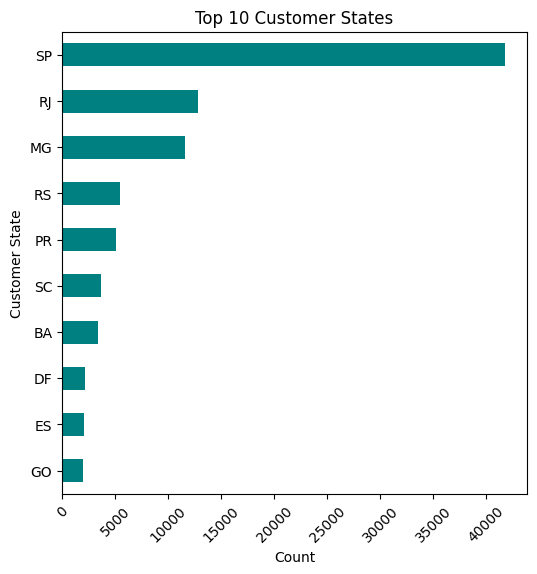

In [381]:
# Plot
plt.figure(figsize=(6, 6))
top_state_cust.plot(kind='barh', color='teal')
plt.title('Top 10 Customer States')
plt.xlabel('Count')
plt.ylabel('Customer State')
plt.xticks(rotation=45)
plt.show()

Dari hasil visualisasi, terlihat bahwa sebagian besar pelanggan berasal dari state **Sao Paulo (SP)**, diikuti oleh Rio De Janeiro (RJ), Minas Gerais (MG), dan seterusnya.

### Pertanyaan 2: Dari state mana sebagian besar penjual beroperasi?

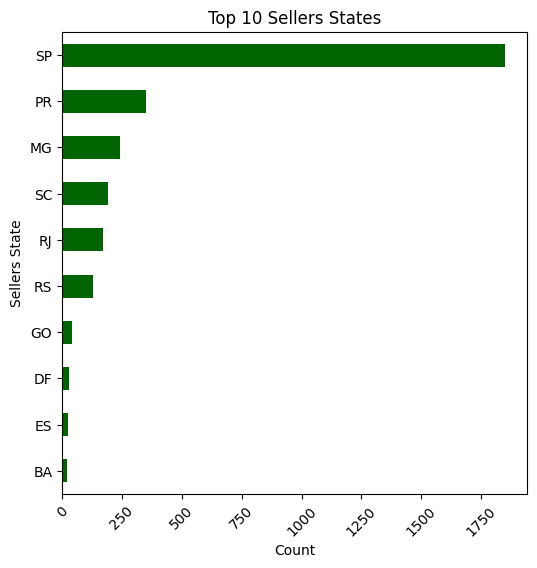

In [382]:
# Plot
plt.figure(figsize=(6, 6))
top_state_sellers.plot(kind='barh', color='darkgreen')
plt.title('Top 10 Sellers States')
plt.xlabel('Count')
plt.ylabel('Sellers State')
plt.xticks(rotation=45)
plt.show()

Dari hasil visualisasi, terlihat bahwa sebagian besar penjual yang beroperasi berasal dari state **Sao Paulo (SP)**, diikuti oleh Paraná (PR), Minas Gerais (MG), dan seterusnya.

### Pertanyaan 3: Payment apa yang paling banyak digunakan?

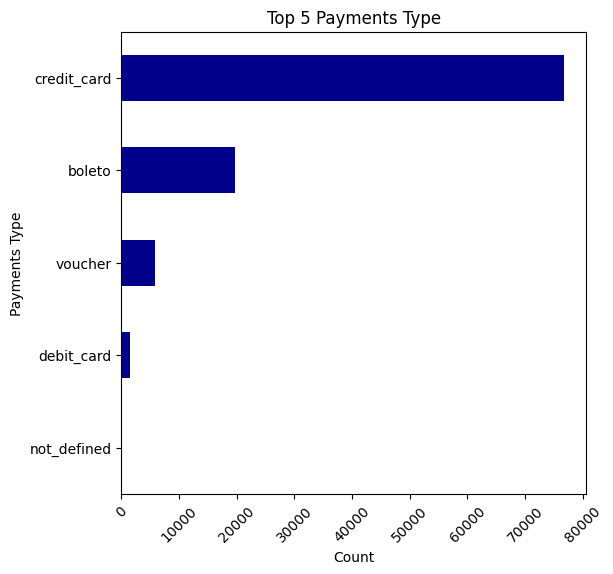

In [383]:
# Plot
plt.figure(figsize=(6, 6))
top_payments_type.plot(kind='barh', color='darkblue')
plt.title('Top 5 Payments Type')
plt.xlabel('Count')
plt.ylabel('Payments Type')
plt.xticks(rotation=45)
plt.show()

Dari hasil visualisasi, terlihat bahwa jenis pembayaran yang paling banyak digunakan adalah **Credit Card**, diikuti oleh Boleto, Voucher, dan Debit Card.

### Pertanyaan 4: Bagaimana perkembangan total penjualan barang tiap bulannya?

Text(0, 0.5, 'Count')

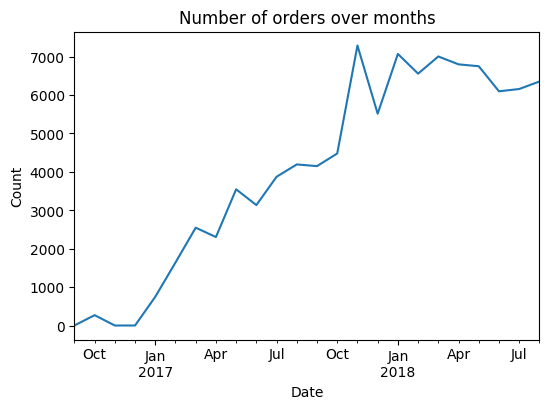

In [384]:
#Plot
plt.figure(figsize = (6, 4))

#Resample into month format
monthly_orders['order_id'].resample('M').count().plot()
plt.title('Number of orders over months')
plt.xlabel('Date')
plt.ylabel('Count')

Dari hasil visualisasi, terlihat bahwa terdapat **peningkatan signifikan dalam penjualan barang yang terjadi pada akhir tahun**, yang kemungkinan besar terjadi karena mendekati musim liburan Natal dan Tahun Baru.

## RFM Analysis

Analisis RFM adalah metode umum yang digunakan untuk mengelompokkan pelanggan ke dalam kategori berdasarkan tiga faktor utama:
1. Recency (seberapa baru pelanggan melakukan transaksi),
2. Frequency (seberapa sering mereka melakukan transaksi),
3. Monetary (seberapa banyak pendapatan yang dihasilkan dari pelanggan tersebut).

Analisis RFM diawali dengan menggabungkan beberapa data yang diperlukan

In [385]:
merged = orders_clean.merge(order_items, on='order_id')
merged = merged.merge(order_payments, on='order_id')
merged = merged.merge(order_reviews, on='order_id')
merged = merged.merge(products, on='product_id')
merged = merged.merge(customers, on='customer_id')
merged = merged.merge(sellers, on='seller_id')
merged = merged.merge(product_category, on='product_category_name')

In [386]:
merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,housewares


### Recency

Karena dataset ini mencakup data tanggal yang telah ada dalam waktu yang cukup lama, kita akan berasumsi bahwa Analisis RFM ini dilakukan dengan menggunakan tanggal terbaru menurut dataset ini.

Melakukan penyesuaian format untuk data berbentuk tanggal

In [387]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
merged["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

In [388]:
#Define newest date
newest_date = orders['order_purchase_timestamp'].max()

print(f"Newest date is: {newest_date}")

Newest date is: 2018-10-17 17:30:18


Mengambil timestamp pembelian terbaru

In [389]:
df_recency = merged.groupby(['customer_unique_id'], as_index = False)['order_purchase_timestamp'].max()
df_recency.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-04-07 12:10:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2017-06-17 20:34:00
2,0000f46a3911fa3c0805444483337064,2018-08-03 14:57:40
3,0000f6ccb0745a6a4b88665a16c9f078,2018-06-20 20:51:47
4,0004aac84e0df4da2b147fca70cf8255,2017-08-09 02:25:08


Membuat kolom baru berupa recency dengan menghitung interval antara tanggal pembelian terbaru dengan 'newest date' yang telah kita asumsikan sebelumnya

In [390]:
df_recency['recency'] = df_recency['order_purchase_timestamp'].apply(lambda x: (newest_date - x).days)

#Show results
df_recency.sort_values(by='recency')

,customer_unique_id,order_purchase_timestamp,recency
70526,c51b05929079be99aeab2ca8e64ff73a,2018-10-17 17:30:18,0.0
1374,03d4c28894c1239ca5a6dd6f0c197921,2018-10-16 20:16:02,0.0
50971,8ee8b7d504a2a0f5a7e2fdcd6b984208,2018-10-03 18:55:29,13.0
8203,16a853c27d847b8331fc1995a143a9f0,2018-10-01 15:30:09,16.0
40733,71be9a28f9608e32a2386e97c6910ffe,2018-09-29 09:13:03,18.0
...,...,...,...
91435,ffe96201d466b0e0dc8139850be29d5d,NaT,NaN
91439,ffeb904468642a1ce663a322629801cb,NaT,NaN
91443,ffecceca389973ef16660d58696f281e,NaT,NaN
91453,fff3a9369e4b7102fab406a334a678c3,NaT,NaN


Melihat pelanggan terbaik berdasarkan recency

In [391]:
top_cust_recency = df_recency.sort_values(by="recency", ascending=True).head(5)

Mengubah index menjadi ID

In [392]:
top_cust_recency = top_cust_recency.set_index('customer_unique_id')

Men-drop kolom timestamp

In [393]:
top_recency_plot = top_cust_recency.drop(['order_purchase_timestamp'], axis=1)
top_recency_plot

,recency
customer_unique_id,
c51b05929079be99aeab2ca8e64ff73a,0.0
03d4c28894c1239ca5a6dd6f0c197921,0.0
8ee8b7d504a2a0f5a7e2fdcd6b984208,13.0
16a853c27d847b8331fc1995a143a9f0,16.0
71be9a28f9608e32a2386e97c6910ffe,18.0


Menampilkan visualisasi

<Figure size 300x300 with 0 Axes>

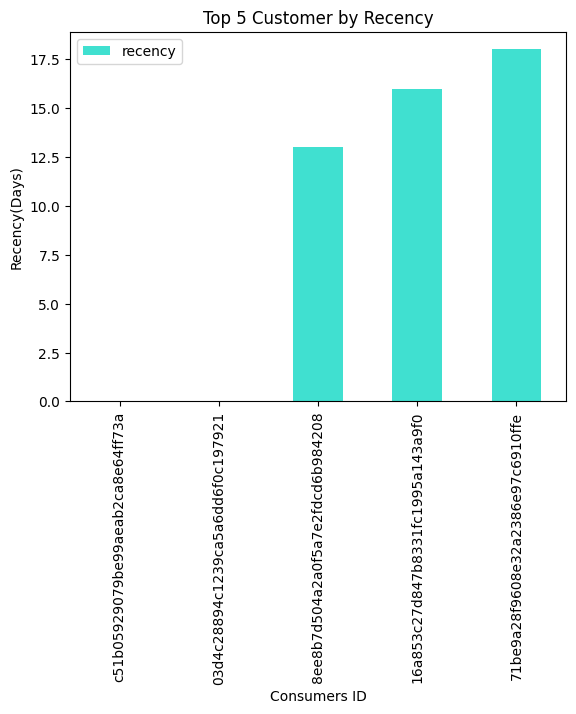

In [394]:
plt.figure(figsize=(3, 3))
top_recency_plot.plot(kind='bar', color='turquoise')
plt.title('Top 5 Customer by Recency')
plt.xlabel('Consumers ID')
plt.ylabel('Recency(Days)')
plt.xticks(rotation=90)
plt.show()

Karena nilai dari tanggal terbaru yang digunakan sebagai asumsi adalah tanggal terbaru dalam dataset ini, maka dapat dilihat bahwa ada dua customer dengan **recency 0**, yaitu:
- customer c51b05929079be99aeab2ca8e64ff73a
- customer 03d4c28894c1239ca5a6dd6f0c197921

yang berarti bahwa kedua customer tersebut baru saja melakukan transaksi hari ini

### Frequency

Frekuensi mengacu pada seberapa sering pelanggan melakukan pembelian atau transaksi

In [395]:
df_frequency = pd.DataFrame(merged.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))

#Rename column
df_frequency.rename(columns={"order_id":"frequency"}, inplace=True)

df_frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91461,fffcf5a5ff07b0908bd4e2dbc735a684,1
91462,fffea47cd6d3cc0a88bd621562a9d061,1
91463,ffff371b4d645b6ecea244b27531430a,1
91464,ffff5962728ec6157033ef9805bacc48,1


Melihat pelanggan terbaik berdasarkan frekuensi

In [396]:
top_freq = df_frequency.sort_values(by="frequency", ascending=True).head(5)
top_freq

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
60538,a93d5bc325f8844f5ae36b1c9b79b3e0,1
60537,a93d58cd1757d89a7bacf6c63d905b98,1
60536,a93d53df97ef9b5c960bfa7bf49605b5,1
60535,a93b7ffb96986b7ae5bef50b9f789ed8,1


Mengubah index

In [397]:
top_cust_freq = top_freq.set_index('customer_unique_id')

Menampilkan visualisasi

<Figure size 300x300 with 0 Axes>

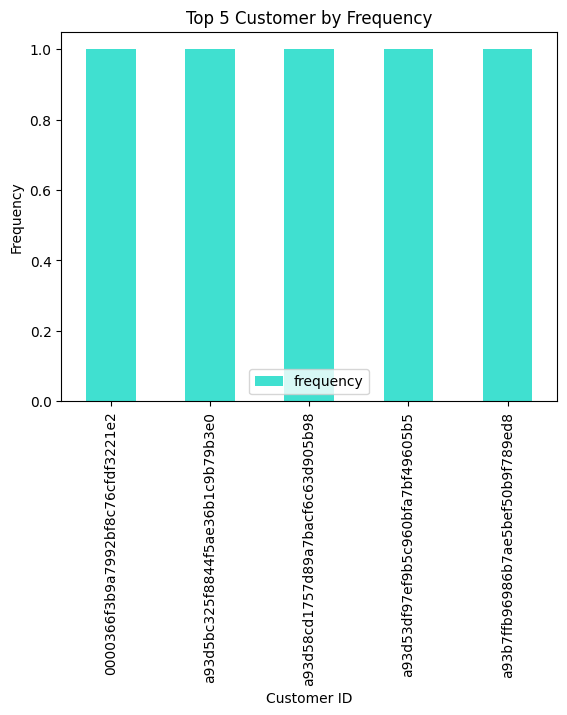

In [398]:
plt.figure(figsize=(3, 3))

top_cust_freq.plot(kind='bar', color='turquoise')
plt.title('Top 5 Customer by Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Nampaknya pada dataset ini, semua frekuensi pembelian dari customer bernilai 1.

Yang artinya tiap ID customer hanya pernah melakukan 1x transaksi

### Monetary

Monetary mengacu pada seberapa banyak nilai pendapatan yang dihasilkan dari pelanggan tertentu

In [399]:
df_monetary = merged.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

#Rename column
df_monetary.rename(columns={"payment_value":"monetary"}, inplace=True)

df_monetary.head().sort_values(by='monetary', ascending=False)

,customer_unique_id,monetary
4,0004aac84e0df4da2b147fca70cf8255,196.89
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19


In [400]:
top_monetary = df_monetary.sort_values(by="monetary", ascending=False).head(5)
top_monetary

,customer_unique_id,monetary
3656,0a0a92112bd4c708ca5fde585afaa872,109312.64
70138,c402f431464c72e27330a67f7b94d4fb,44048.00
22941,4007669dec559734d6f53e029e360987,36489.24
85691,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00
42296,763c8b1c9c68a0229c42c9fc6f662b93,29099.52


Mengubah index

In [401]:
top_cust_monetary = top_monetary.set_index('customer_unique_id')

Menampilkan visualisasi

<Figure size 300x300 with 0 Axes>

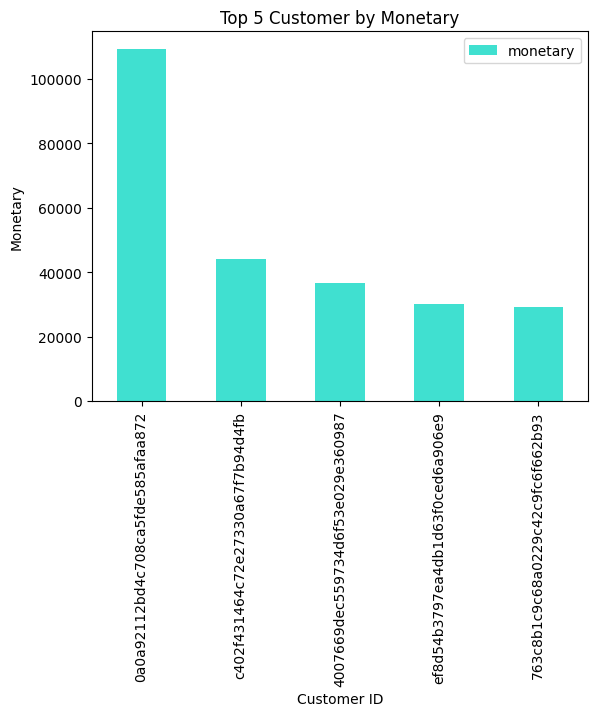

In [402]:
plt.figure(figsize=(3, 3))

top_cust_monetary.plot(kind='bar', color='turquoise')
plt.title('Top 5 Customer by Monetary')
plt.xlabel('Customer ID')
plt.ylabel('Monetary')
plt.xticks(rotation=90)
plt.show()

Dari hasil visualisasi, terlihat bahwa pelanggan terbaik berdasarkan monetary adalah **customer dengan ID 0a0a92112bd4c708ca5fde585afaa872**

## Conclusion

Dari hasil analisis data, dapat disimpulkan bahwa:
- Sebagian besar pelanggan berasal dari state **Sao Paulo (SP)**
- Sebagian besar penjual yang beroperasi berasal dari state **Sao Paulo (SP)**
- Jenis pembayaran yang paling banyak digunakan dalam transaksi adalah **Credit Card**
- Terdapat **peningkatan signifikan dalam penjualan barang yang terjadi pada akhir tahun**, yang kemungkinan besar terjadi karena mendekati musim liburan Natal dan Tahun Baru.

Sebagai penutup, telah didapatkan berbagai wawasan berharga seperti asal state pelanggan, asal state penjual, jenis pembayaran yang digunakan, tren penjualan bulanan, dan bahkan kasus-kasus mengenai pengiriman. Selain itu, telah dilakukan pula segmentasi pelanggan menggunakan metode RFM untuk meningkatkan pengalaman pelanggan dan profitabilitas bisnis.

Harapannya insight-insight yang didapatkan dapat membantu menjawab pertanyaan bisnis serta merumuskan strategi yang lebih profitable untuk masa depan.